## Set up libraries

In [47]:
import os

import numpy as np  
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.plotly as py
#import cufflinks as cf
#os.getcwd()

###### Read Big Mac raw data

In [48]:
big_mac_raw_df=pd.read_csv('big-mac-full-index.csv', parse_dates=['date'])

###### Display data basic info

In [49]:
#big_mac_raw_df.info()

In [50]:
#big_mac_raw_df.head(5)

In [51]:
big_mac_df=big_mac_raw_df[(big_mac_raw_df['date'] > '2011-12-31 01:00:00')]
big_mac_df['date'].value_counts().keys().sort_values(ascending=False)

DatetimeIndex(['2018-01-01', '2017-07-01', '2017-01-01', '2016-07-01',
               '2016-01-01', '2015-07-01', '2015-01-01', '2014-07-01',
               '2014-01-01', '2013-07-01', '2013-01-01', '2012-07-01',
               '2012-01-01'],
              dtype='datetime64[ns]', freq=None)

In [52]:
big_mac_df['name'].value_counts(dropna=False)

India             13
Euro area         13
Sweden            13
Hong Kong         13
China             13
UAE               13
Brazil            13
Saudi Arabia      13
Chile             13
Switzerland       13
Poland            13
Ukraine           13
Thailand          13
South Korea       13
New Zealand       13
Norway            13
Uruguay           13
Indonesia         13
Japan             13
Colombia          13
Denmark           13
Australia         13
Pakistan          13
Russia            13
Turkey            13
Argentina         13
Czech Republic    13
Canada            13
United States     13
Israel            13
Sri Lanka         13
Mexico            13
Hungary           13
Malaysia          13
Britain           13
South Africa      13
Singapore         13
Taiwan            13
Philippines       13
Egypt             13
Costa Rica        12
Peru              12
Vietnam            8
Name: name, dtype: int64

In [53]:
countries_list= big_mac_df['name'].value_counts(dropna=False)[big_mac_df['name'].value_counts(dropna=False)==13].keys().values
print(countries_list)

['India' 'Euro area' 'Sweden' 'Hong Kong' 'China' 'UAE' 'Brazil'
 'Saudi Arabia' 'Chile' 'Switzerland' 'Poland' 'Ukraine' 'Thailand'
 'South Korea' 'New Zealand' 'Norway' 'Uruguay' 'Indonesia' 'Japan'
 'Colombia' 'Denmark' 'Australia' 'Pakistan' 'Russia' 'Turkey' 'Argentina'
 'Czech Republic' 'Canada' 'United States' 'Israel' 'Sri Lanka' 'Mexico'
 'Hungary' 'Malaysia' 'Britain' 'South Africa' 'Singapore' 'Taiwan'
 'Philippines' 'Egypt']


In [54]:
#get rid of countries that did not appear all the time
big_mac_df = big_mac_df[big_mac_df['name'].isin(countries_list)]
#now we have 40 countries data for 13 periods
big_mac_df = big_mac_df.drop(big_mac_df.columns[range(7,19)], axis='columns')
#now we get rid of unneccesary columns
big_mac_df.head(5)

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price
554,2012-01-01,ARE,AED,UAE,12.00,3.673000,3.267084
555,2012-01-01,ARG,ARS,Argentina,20.00,4.313500,4.636606
556,2012-01-01,AUS,AUD,Australia,4.80,0.972337,4.936560
557,2012-01-01,BRA,BRL,Brazil,10.25,1.805000,5.678670
558,2012-01-01,CAN,CAD,Canada,4.73,1.020950,4.632940


In [55]:
#set index so that we can find reference american price for that time
big_mac_df.set_index(['date'], inplace=True)
big_mac_df.head(5)

,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price
date,,,,,,
2012-01-01,ARE,AED,UAE,12.00,3.673000,3.267084
2012-01-01,ARG,ARS,Argentina,20.00,4.313500,4.636606
2012-01-01,AUS,AUD,Australia,4.80,0.972337,4.936560
2012-01-01,BRA,BRL,Brazil,10.25,1.805000,5.678670
2012-01-01,CAN,CAD,Canada,4.73,1.020950,4.632940


In [56]:
big_mac_df['reference_price']=big_mac_df[big_mac_df['name']=='United States'].local_price

In [57]:
big_mac_df['valuation']=(big_mac_df['reference_price']-big_mac_df['dollar_price'])/big_mac_df['reference_price']
big_mac_df.head(5)

,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,reference_price,valuation
date,,,,,,,,
2012-01-01,ARE,AED,UAE,12.00,3.673000,3.267084,4.19722,0.221608
2012-01-01,ARG,ARS,Argentina,20.00,4.313500,4.636606,4.19722,-0.104685
2012-01-01,AUS,AUD,Australia,4.80,0.972337,4.936560,4.19722,-0.176150
2012-01-01,BRA,BRL,Brazil,10.25,1.805000,5.678670,4.19722,-0.352960
2012-01-01,CAN,CAD,Canada,4.73,1.020950,4.632940,4.19722,-0.103812


In [58]:
big_mac_df.reset_index(inplace=True)
big_mac_df_pivot = big_mac_df.pivot(index='date', columns='name', values='valuation')

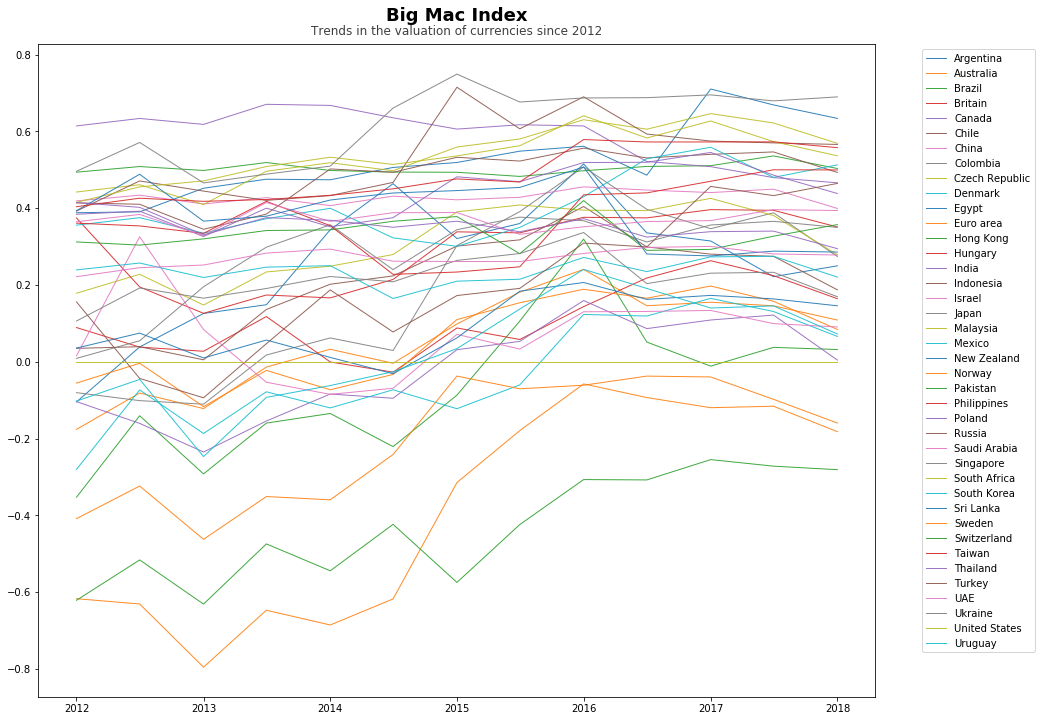

In [59]:
fig, ax = plt.subplots(figsize=(15,12))

for column in big_mac_df_pivot:
    plt.plot(big_mac_df_pivot.index, big_mac_df_pivot[column], marker='', linewidth=1, alpha=0.9, label=column)

ax.text(x=0.5, y=1.03, s='Big Mac Index', fontsize=18, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.01, s='Trends in the valuation of currencies since 2012', fontsize=12, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
          
h,l = ax.get_legend_handles_labels()
ax.legend(h,l, bbox_to_anchor=(1.05,1))

plt.show()



In [60]:
#To Do:
#Show the ones with highest fluctuations over long run
#Show the ones with highest fluctuations over short run
#Plotly graphs
#Group by regions
#PCA and then clustering

In [61]:
#create multi-dimensional df (indexed by date and country)

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,reference_price,valuation
0,2012-01-01,ARE,AED,UAE,12.00,3.673000,3.267084,4.19722,0.221608
1,2012-01-01,ARG,ARS,Argentina,20.00,4.313500,4.636606,4.19722,-0.104685
2,2012-01-01,AUS,AUD,Australia,4.80,0.972337,4.936560,4.19722,-0.176150
3,2012-01-01,BRA,BRL,Brazil,10.25,1.805000,5.678670,4.19722,-0.352960
4,2012-01-01,CAN,CAD,Canada,4.73,1.020950,4.632940,4.19722,-0.103812
